#### Lab 9 - Dense Neural Network
- Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with

4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Number of classes: 10


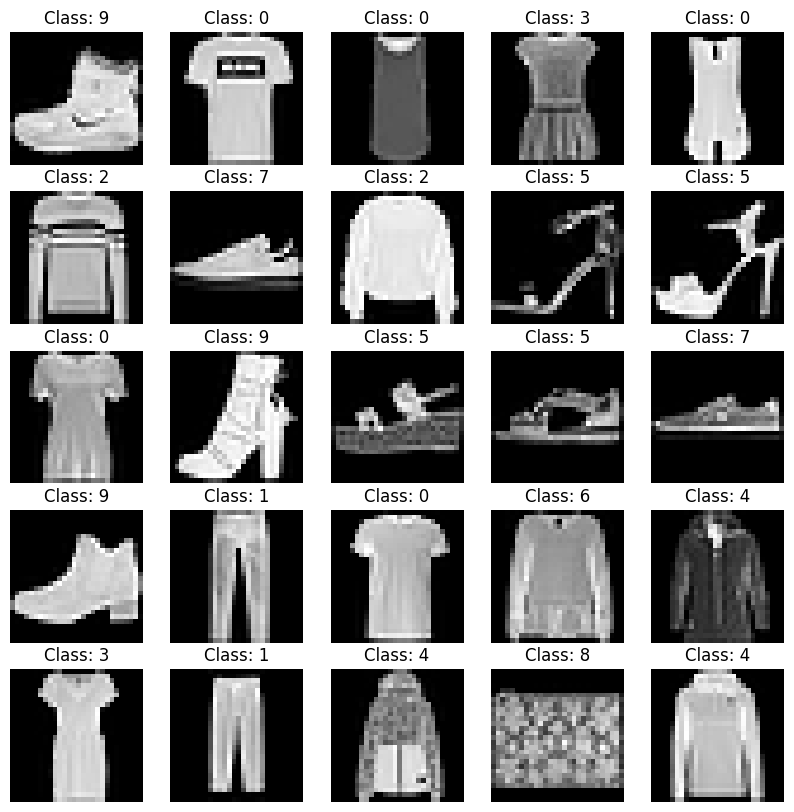

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Display basic information about the dataset
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Number of classes:", len(np.unique(y_train)))

# Visualize a few sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Class: {y_train[i]}")
    plt.axis('off')
plt.show()


In [2]:
# Explore data distribution
print("Pixel value range:", np.min(x_train), "to", np.max(x_train))
print("Mean pixel value:", np.mean(x_train))
print("Standard deviation of pixel values:", np.std(x_train))

Pixel value range: 0 to 255
Mean pixel value: 72.94035223214286
Standard deviation of pixel values: 90.02118235130519


- Train a dense neural network using Keras, try out at least three hyperparameters configurations

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_flat = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define a function to create and train the model


def create_and_train_model(units, activation, optimizer, epochs=10, batch_size=32):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(units, activation=activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train_flat, y_train_one_hot, epochs=epochs,
                        batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history


# Configuration 1
model1, history1 = create_and_train_model(
    units=128, activation='relu', optimizer='adam', epochs=10)

# Configuration 2
model2, history2 = create_and_train_model(
    units=256, activation='sigmoid', optimizer='sgd', epochs=10)

# Configuration 3
model3, history3 = create_and_train_model(
    units=64, activation='tanh', optimizer='rmsprop', epochs=10)

In [5]:
# Evaluate models
loss1, accuracy1 = model1.evaluate(x_test_flat, y_test_one_hot)
print("Configuration 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test_flat, y_test_one_hot)
print("Configuration 2 - Test Accuracy:", accuracy2)

loss3, accuracy3 = model3.evaluate(x_test_flat, y_test_one_hot)
print("Configuration 3 - Test Accuracy:", accuracy3)

313/313 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8806
Configuration 1 - Test Accuracy: 0.8805999755859375
313/313 [==============================] - 1s 2ms/step - loss: 0.5203 - accuracy: 0.8156
Configuration 2 - Test Accuracy: 0.8155999779701233
313/313 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8729
Configuration 3 - Test Accuracy: 0.8729000091552734


- Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration

313/313 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8806
Test Accuracy: 0.8805999755859375
313/313 [==============================] - 1s 2ms/step


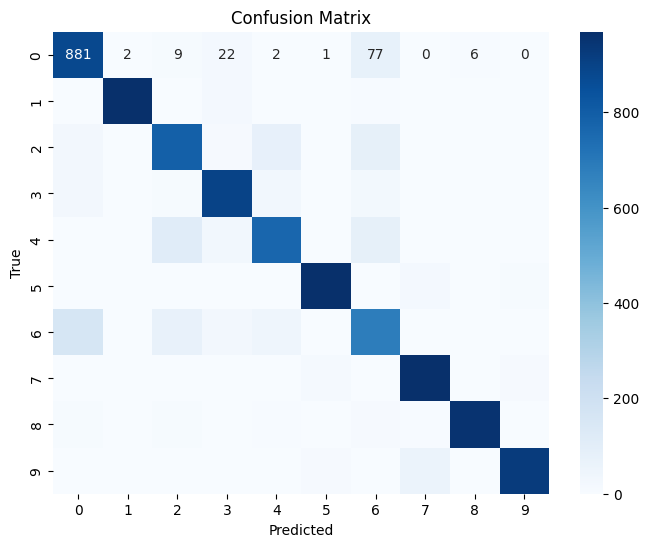

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.79      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.77      0.79      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.68      0.69      1000
           7       0.92      0.97      0.94      1000
           8       0.98      0.95      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



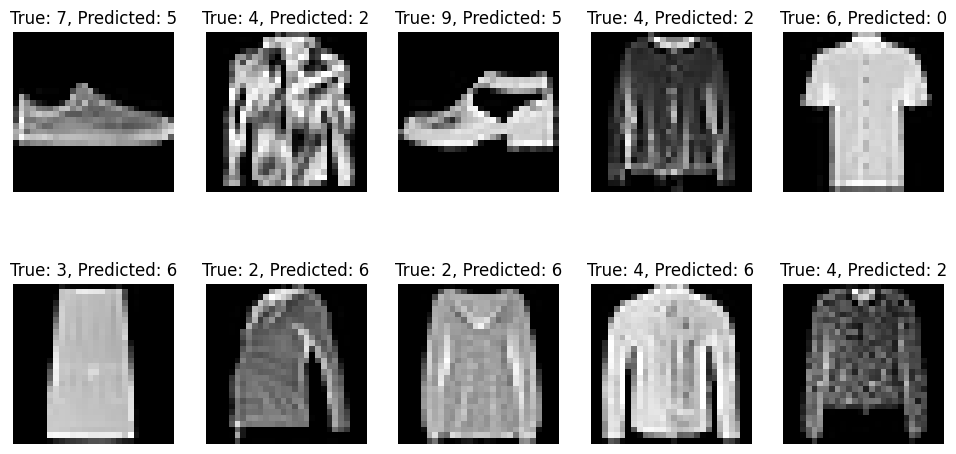

313/313 [==============================] - 1s 2ms/step - loss: 0.5203 - accuracy: 0.8156
Test Accuracy: 0.8155999779701233
313/313 [==============================] - 1s 2ms/step


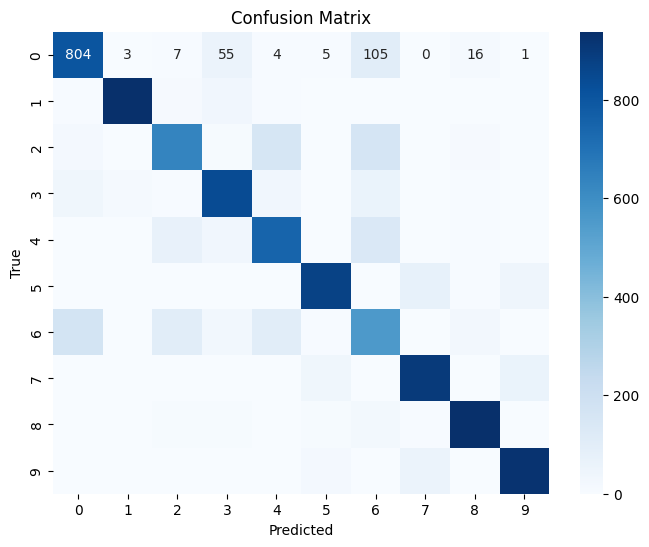

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      1000
           1       0.97      0.94      0.96      1000
           2       0.75      0.64      0.69      1000
           3       0.83      0.84      0.83      1000
           4       0.71      0.75      0.73      1000
           5       0.92      0.87      0.89      1000
           6       0.53      0.56      0.54      1000
           7       0.87      0.90      0.88      1000
           8       0.92      0.94      0.93      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



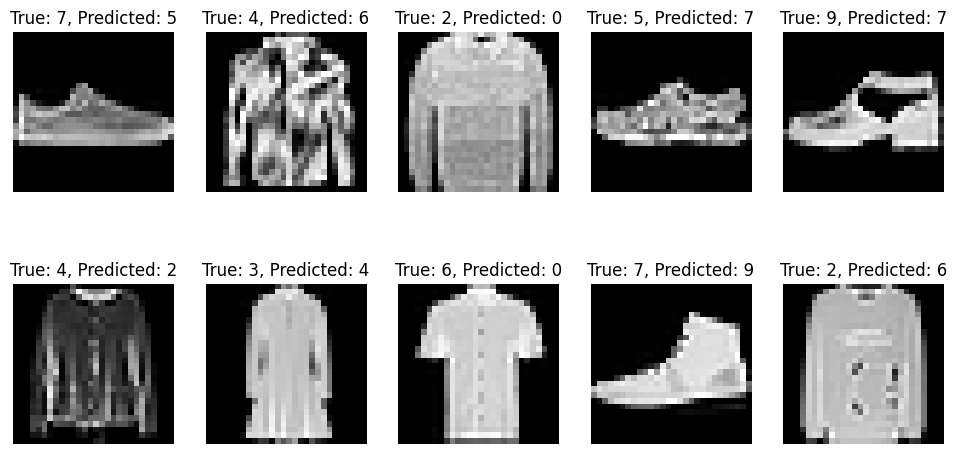

313/313 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8729
Test Accuracy: 0.8729000091552734
313/313 [==============================] - 0s 1ms/step


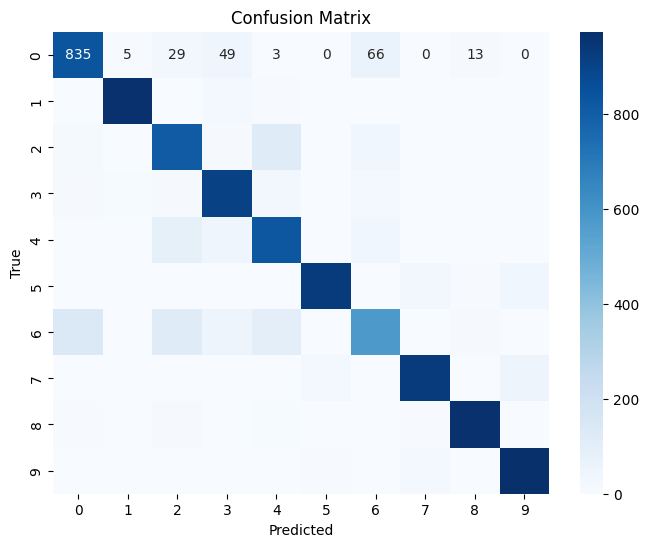

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.81      0.78      1000
           3       0.83      0.91      0.87      1000
           4       0.76      0.83      0.79      1000
           5       0.97      0.93      0.95      1000
           6       0.78      0.58      0.66      1000
           7       0.95      0.93      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.92      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



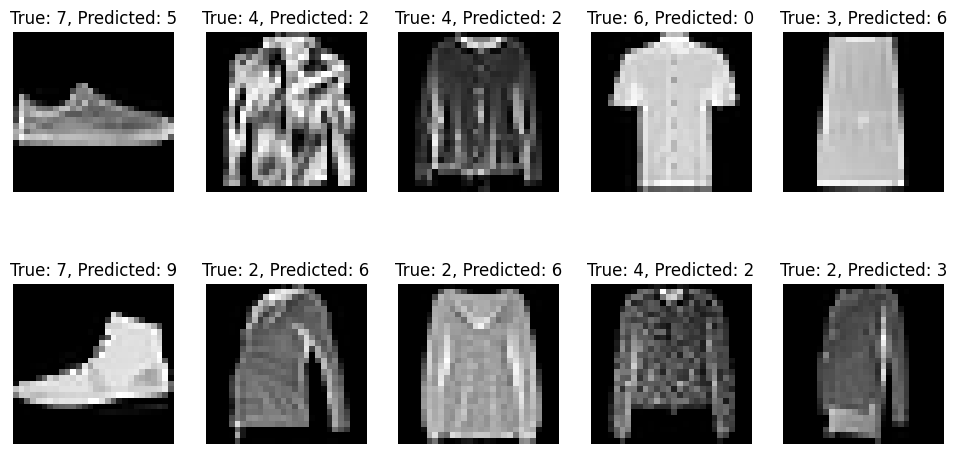

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate models


def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test)
    print("Test Accuracy:", accuracy)

    # Predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Display some examples of incorrect classifications
    incorrect_indices = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(incorrect_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[idx]}, Predicted: {y_pred[idx]}')
        plt.axis('off')
    plt.show()


# Evaluate Configuration 1
evaluate_model(model1, x_test_flat, y_test_one_hot)

# Evaluate Configuration 2
evaluate_model(model2, x_test_flat, y_test_one_hot)

# Evaluate Configuration 3
evaluate_model(model3, x_test_flat, y_test_one_hot)